In [1]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
## Load the dataset
from sklearn.datasets import load_iris
iris=load_iris()
print(iris['DESCR'])
print(iris['target'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
##independent features
X=pd.DataFrame(iris['data'],columns=['sepal length in cm','sepal width','petal length','petal width'])
##dependent features
y=iris['target']

In [10]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [15]:
## apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier(criterion='entropy')
treeclassifier.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


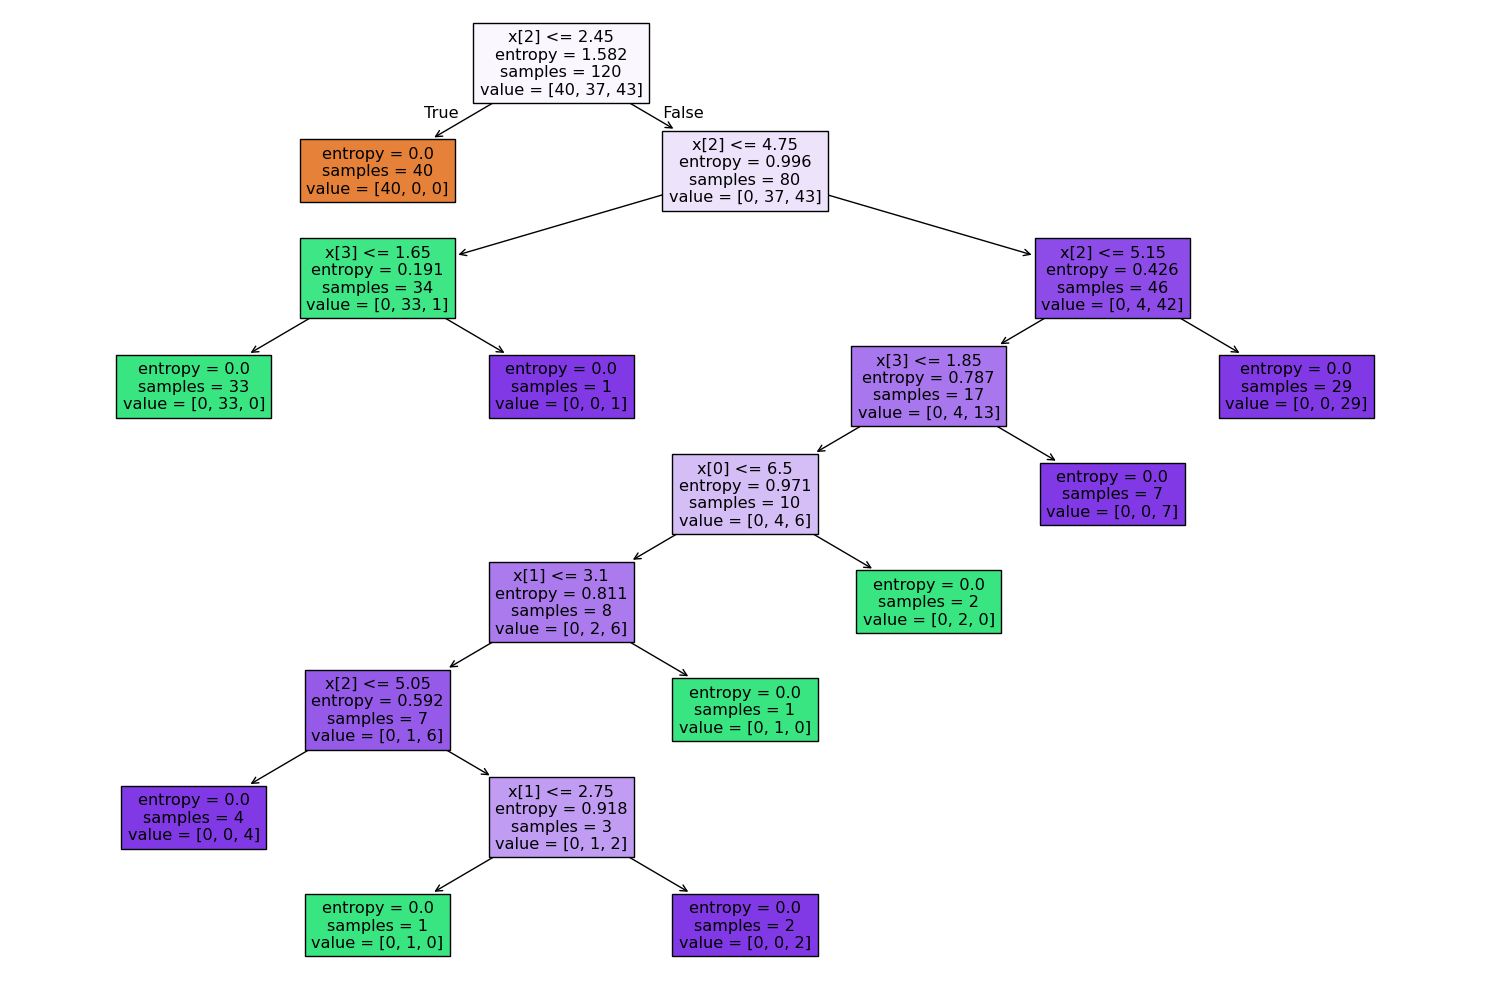

In [ ]:
## Visualize the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)
plt.tight_layout()
plt.show()

In [17]:
## Prediction and evaluation
from sklearn.metrics import confusion_matrix,classification_report
y_pred=treeclassifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Decision Tree Classifier Prepruning And Hyperparameter Tuning


In [18]:
## Define the hyperparameter
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [19]:
## Model
from sklearn.model_selection import GridSearchCV
treemodel=DecisionTreeClassifier()
grid=GridSearchCV(treeclassifier,param_grid=param,cv=5,scoring='accuracy')

In [20]:
## Fit the training data
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

,estimator,DecisionTreeC...ion='entropy')
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'log_loss'


In [21]:
## Best Parameters
best_param = grid.best_params_
print(best_param)

{'criterion': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'splitter': 'best'}


In [22]:
## Best accuracy score
best_score = grid.best_score_
print(best_score)

0.95


In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=grid.predict(X_test)
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(score)
print(cm)
print(classification_report(y_test,y_pred))

1.0
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

